In [1]:
%pip install joblib
%pip install mglearn # do this only for the first time

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm import  LinearSVC
import sklearn.metrics as sklm
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score

C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Import of the file

Import of the file (table 100x16, where number of rows is number of patients and columns are intervals. The last column is "Category", with values "Control" and "MI"). Intervals are features and column "Category" is label. Since dataset contains information about 50 'Control'and 50 'MI' patients, it is considered as dataset with balanced classes. 

In [2]:
file="patientdata"
df=pd.read_excel("LeadII_Table.xlsx",header=0) 

It is expected that all columns except the last one are type float64.

In [3]:
df.dtypes

RR_interval        float64
PR_interval        float64
QRS_interval       float64
QT_interval        float64
QTc_interval       float64
PR_segment         float64
ST_segment         float64
TP_segment         float64
P_duration         float64
T_duration         float64
T_peak_to_T_end    float64
PP_interval        float64
P_amplitude        float64
QRS_amplitude      float64
T_amplitude        float64
Category            object
dtype: object

The first five rows are shown in the next cell.

In [4]:
df.head()

,RR_interval,PR_interval,QRS_interval,QT_interval,QTc_interval,PR_segment,ST_segment,TP_segment,P_duration,T_duration,T_peak_to_T_end,PP_interval,P_amplitude,QRS_amplitude,T_amplitude,Category
0,595.836249,178.775415,97.163335,346.982129,14.215800,39.082510,119.186253,-525.757544,139.692905,130.632541,68.206288,595.815415,0.159982,0.800288,0.141734,Control
1,624.552964,154.811940,92.740572,358.124624,14.330748,12.408009,109.618676,-512.936564,142.403931,155.765376,71.000443,624.593706,0.111014,0.429408,0.185221,Control
2,984.433532,187.530725,107.700807,412.701957,13.160686,48.298117,157.035599,-600.232682,139.232608,147.965550,71.733063,984.563905,0.118634,1.647660,0.566419,Control
3,900.030239,207.497489,96.363981,389.391494,12.986681,34.127394,153.240788,-596.888983,173.370096,139.786725,67.787676,898.103649,0.036947,2.026734,0.487679,Control
4,878.097245,192.091166,97.969668,366.971538,12.391617,50.759990,118.149731,-559.062704,141.331176,150.852139,71.061612,878.127743,0.049894,1.240026,0.238325,Control


Statistical summary is given by .describe()

In [5]:
df.describe()

,RR_interval,PR_interval,QRS_interval,QT_interval,QTc_interval,PR_segment,ST_segment,TP_segment,P_duration,T_duration,T_peak_to_T_end,PP_interval,P_amplitude,QRS_amplitude,T_amplitude
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,826.503831,172.401431,93.450467,385.323510,13.516118,33.482209,126.864330,-557.724941,138.956237,165.087973,82.906532,826.526403,0.097676,0.806903,0.180713
std,167.420272,26.984811,14.608753,41.877350,1.076141,22.013020,40.379764,56.952821,10.525890,40.815641,30.119081,167.504271,0.036378,0.480588,0.168618
min,428.707132,126.425729,63.374401,261.644887,10.136313,2.830162,5.197722,-749.012380,120.799729,126.099633,62.399763,428.825425,-0.012791,-0.534128,-0.598879
25%,699.112367,156.404736,85.882498,363.224263,12.813764,18.009186,113.546796,-590.186933,131.536775,142.979055,68.658978,699.267080,0.074577,0.519188,0.090664
50%,795.469869,168.125355,94.107808,377.241017,13.332059,32.009135,132.300842,-551.163850,136.937764,147.797319,70.947796,795.378120,0.100454,0.794320,0.186908
75%,943.514986,185.302302,100.574342,410.949912,14.120042,42.609226,153.014052,-524.372527,142.374052,166.056135,80.280392,943.427349,0.123003,1.038563,0.283696
max,1297.522683,320.012631,135.525228,539.903672,16.749287,155.419149,229.506203,-399.844011,173.370096,348.279707,272.439992,1297.742224,0.171802,2.196136,0.566419


# Visualization 

<IPython.core.display.Javascript object>


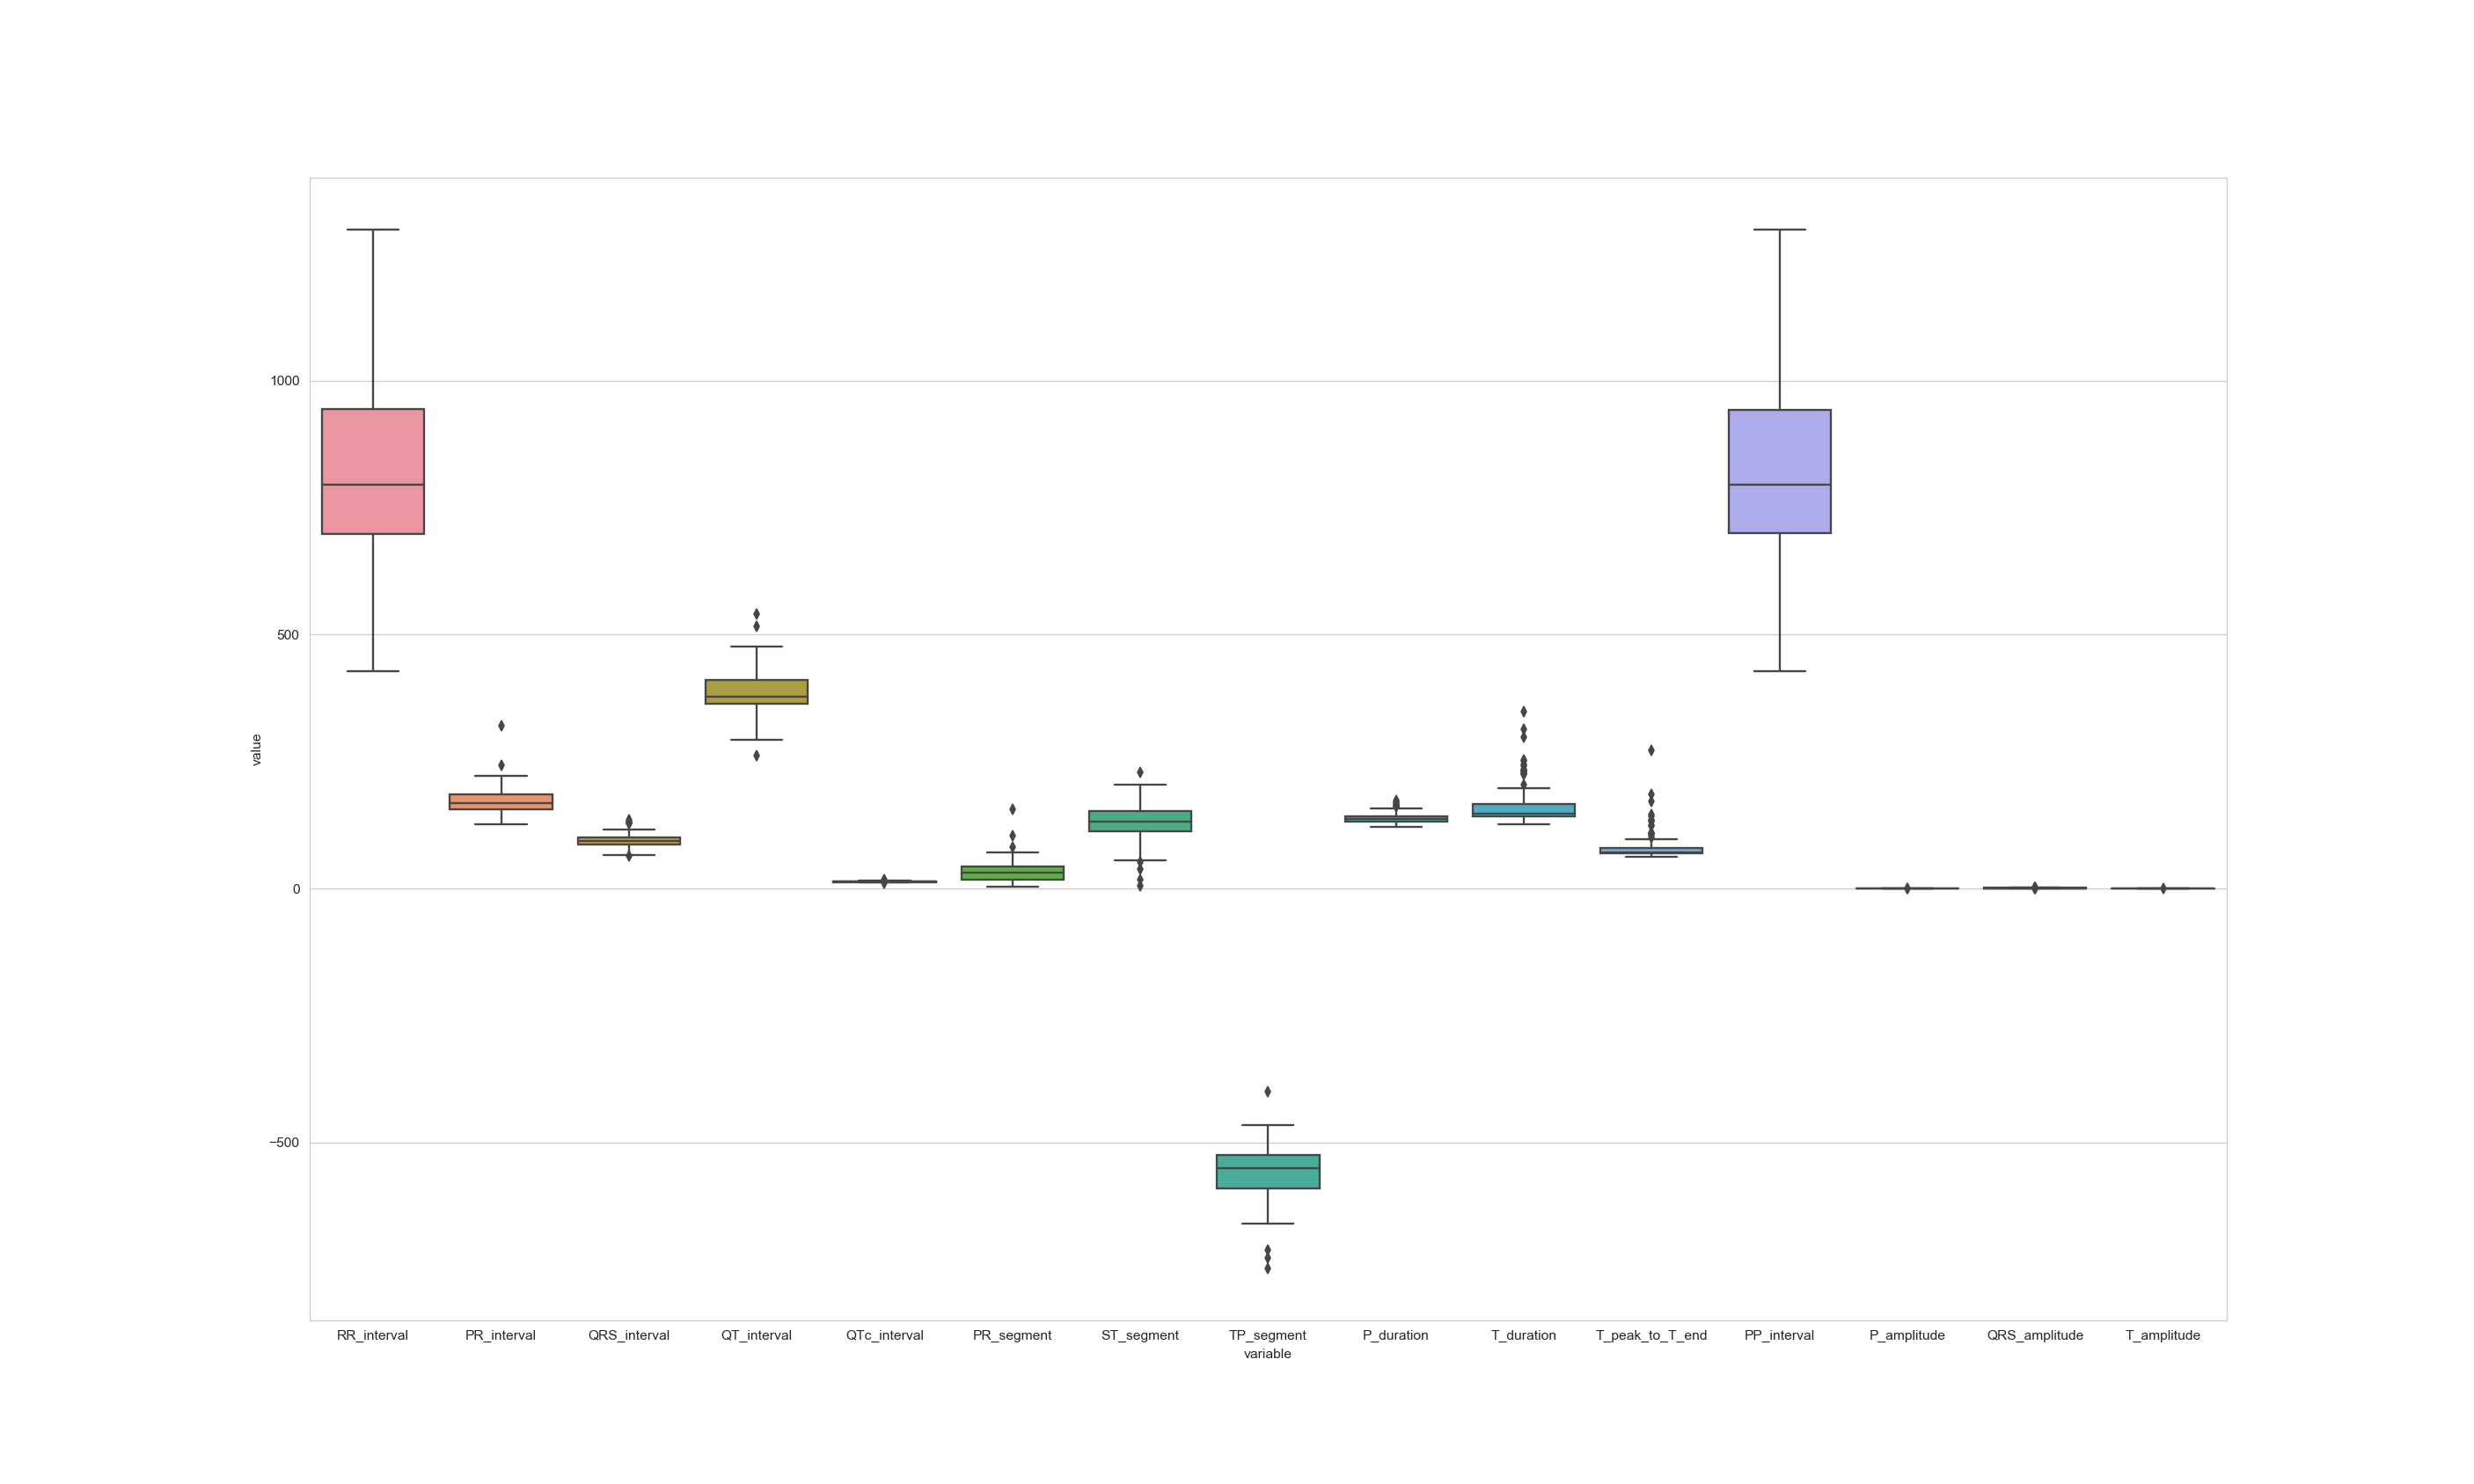

In [6]:
%matplotlib notebook
plt.figure(figsize=(25, 15))
sns.set_style("whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns[:15]]))
plt.show()


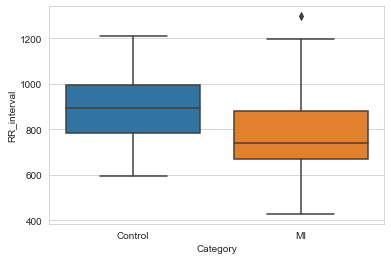

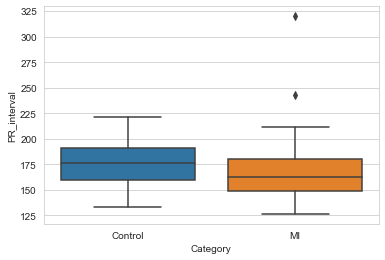

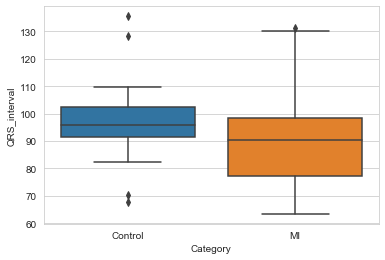

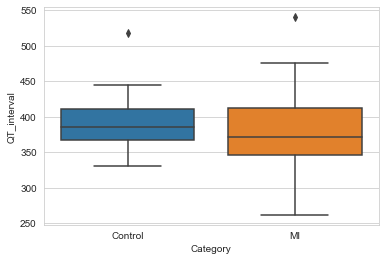

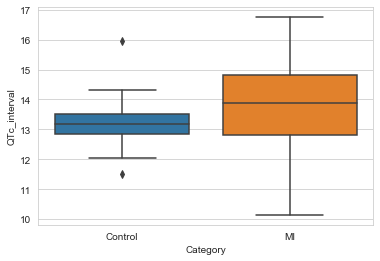

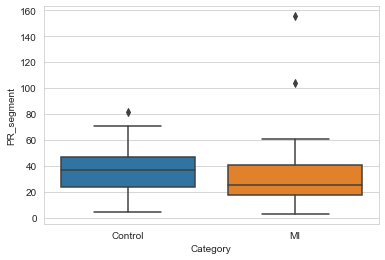

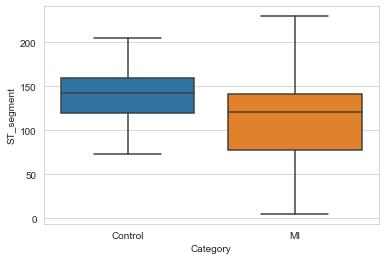

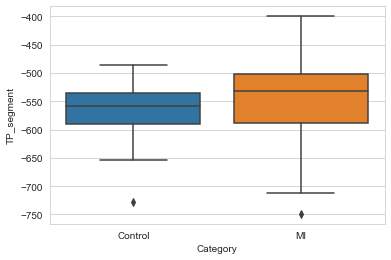

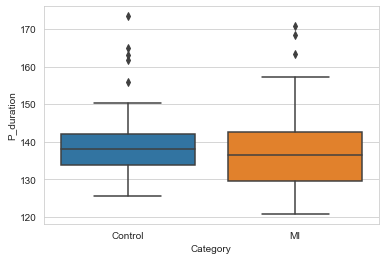

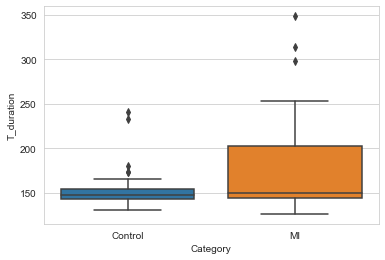

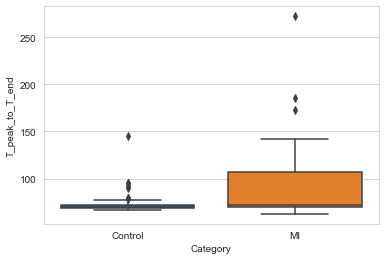

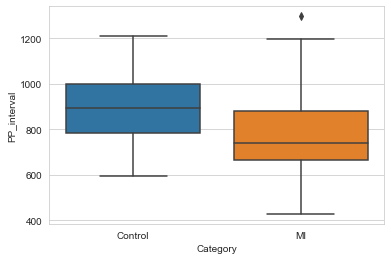

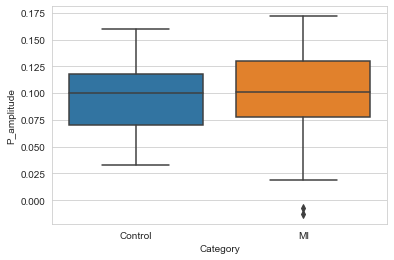

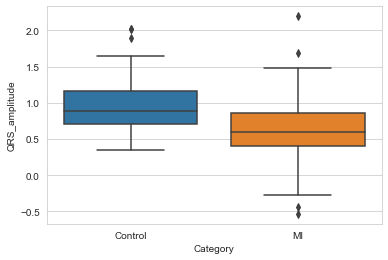

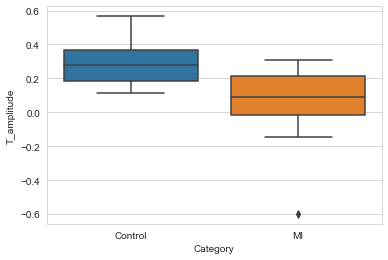

In [7]:
%matplotlib inline
def plot_box(df, cols, col_x = "Category"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(df, df.columns[:15])

#### Comment: RR_interval,QRS_interval,QTc_interval,ST_segment,T_duration,T_peak_to_T_end,PP_interval, QRS_amplitude, T_amplitude for Control and MI patients are well defined.

In addition to this, violin plot is added.
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.

The anatomy of a violin plot have many of the same summary statistics as box plots:

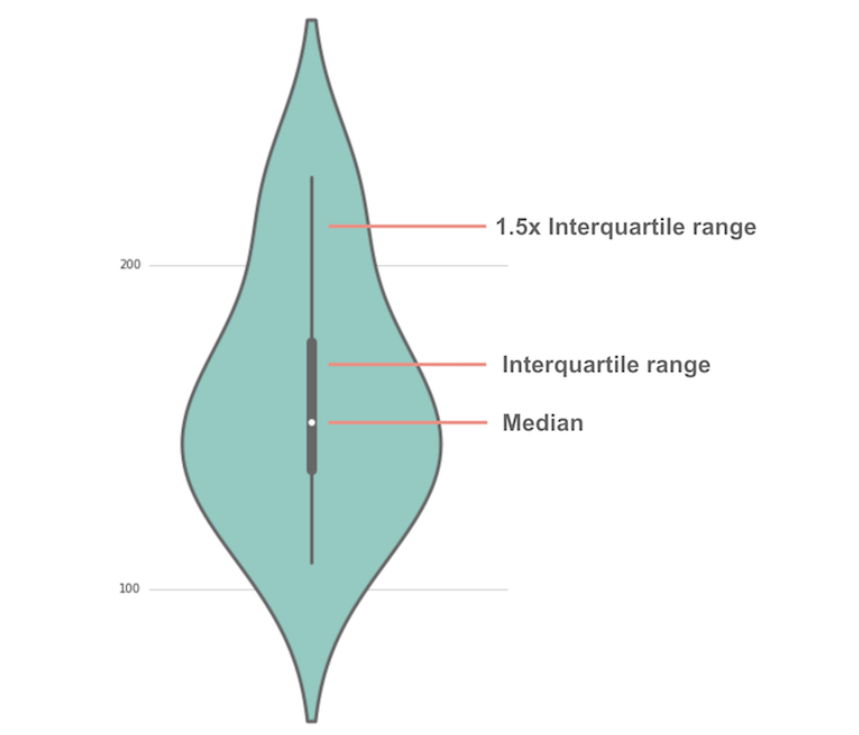
the white dot represents the median

the thick gray bar in the center represents the interquartile range

the thin gray line represents the rest of the distribution, except for points 
that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

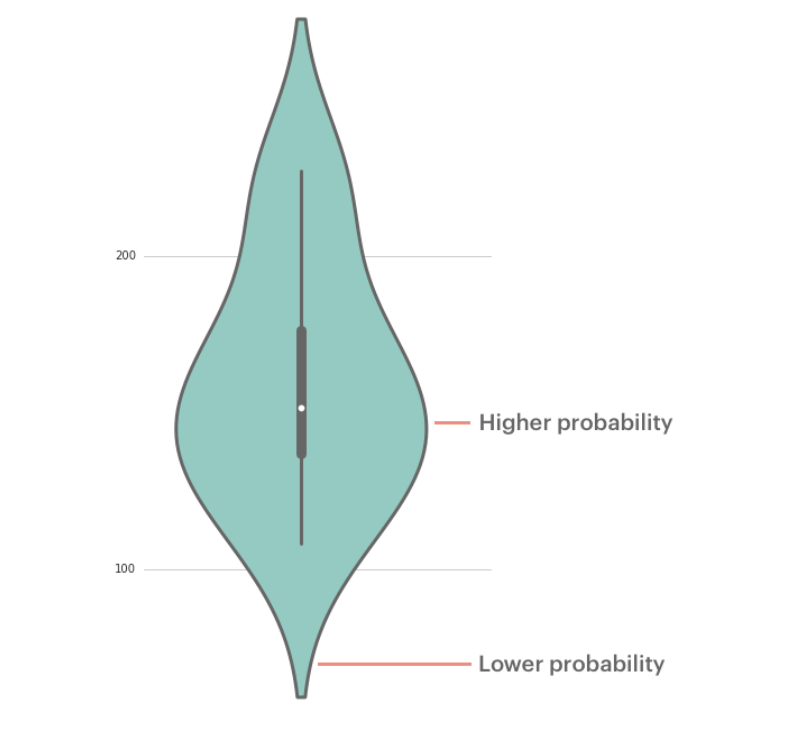

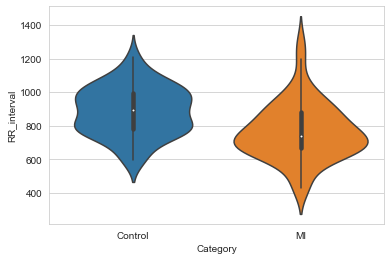

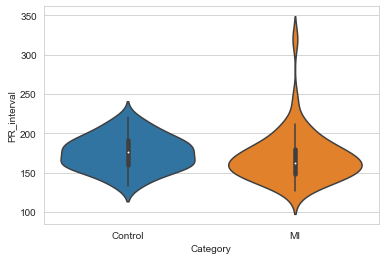

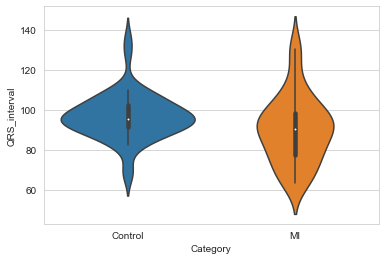

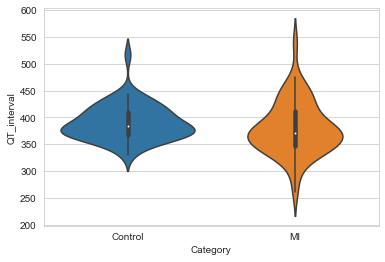

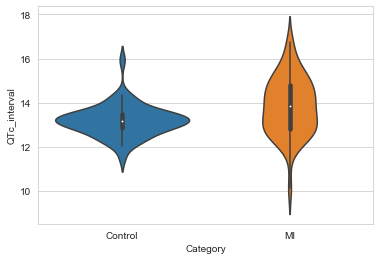

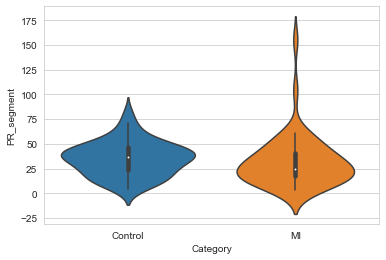

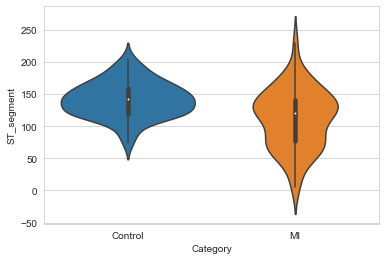

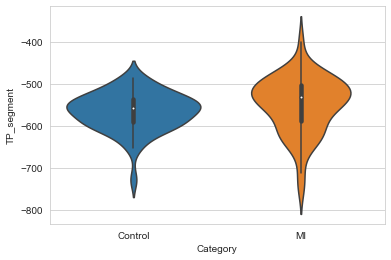

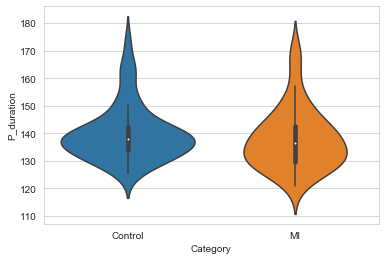

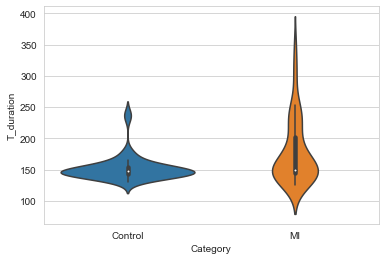

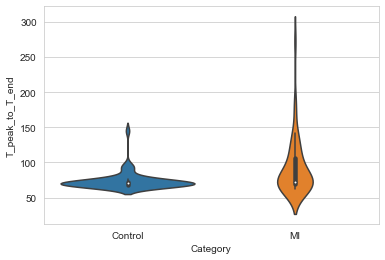

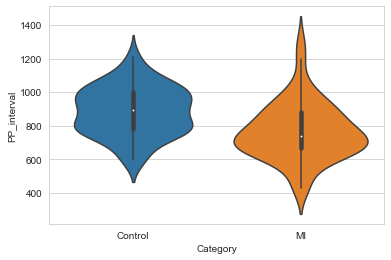

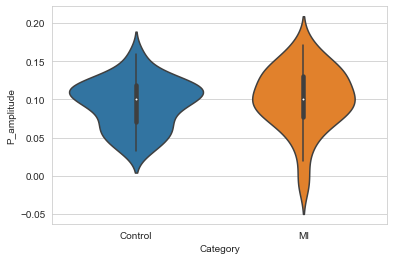

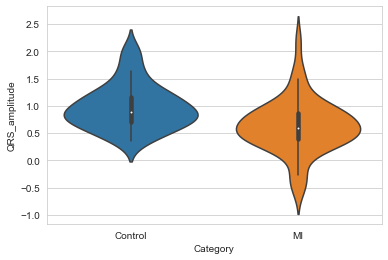

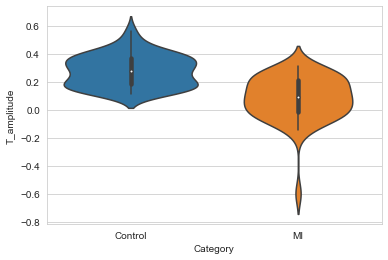

In [8]:
#violin will be explained later. White circle is the mean value
def plot_violin(df, cols, col_x = "Category"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, df.columns[:15])

For the next step, it is necessary to label classes "Control" with 0 (negative) and "MI" as 1 (positive) because it can not be done with string characters. 

In [4]:
df["Category"] = df["Category"].map({"Control":0,"MI":1})

One way to analyze the data is by splitting it into train and test, with train size as 80% and test size as 20%. The other one is made by using cross-validation score.

### Train - test split 

In [5]:
df_split = train_test_split(np.asmatrix(df), train_size = 80,random_state=0,shuffle=True)
df_train_features = df_split[0][:, :15]
df_train_labels = np.ravel(df_split[0][:, 15])
df_test_features = df_split[1][:, :15]
df_test_labels = np.ravel(df_split[1][:, 15])
print(df_train_features.shape)
print(df_train_labels.shape)
print(df_test_features.shape)
print(df_test_labels.shape)

(80, 15)
(80,)
(20, 15)
(20,)


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_train_features)
df_train_features = scaler.transform(df_train_features)
df_test_features = scaler.transform(df_test_features)

### Cross-validation

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross- validation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets. For each of these five splits of the data into training and test sets, we compute the
accuracy. In the end, we have collected five accuracy values. 

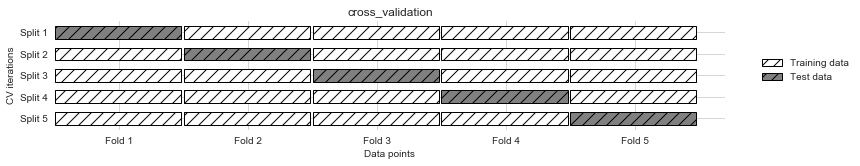

In [290]:
mglearn.plots.plot_cross_validation()

Looking at  scores produced by the five-fold cross-validation,there can be a relatively high variance in the accuracy between folds. If the accuracy range is wide, it can imply that the model is very dependent on the particular folds used for training, but it could also just be a consequence of the small size of the dataset.

When using cross-validation, each example will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high.

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more effectively. When using train_test_split, we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data (90%) to fit the model. More data will usually result in more accurate models.
The main disadvantage of cross-validation is increased computational cost.

#### Stratified cross-validation

As the simple k-fold strategy fails here, scikit-learn does not use it for classification, but rather uses stratified k-fold cross-validation. In stratified cross-validation, wesplit the data such that the proportions between classes are the same in each fold as they are in the whole dataset. For example, if 90% of your samples belong to class A and 10% of your samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B.
It is usually a good idea to use stratified k-fold cross-validation instead of k-fold cross-validation to evaluate a classifier, because it results in more reliable estimates of generalization performance. 

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score
def cross_val(model):
    skf=StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
    scores = cross_val_score(model,df,df["Category"].astype("int"),cv=skf,)
    print("Cross-validation scores: {}".format(scores))
    return print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Evaluation of the model - Introduction

Given the results of the test data, how can you quantify the performance of the model? In general, you must **always use multiple metrics to evaluate the performance of any machine leaning model**, including classifiers. 

For classifiers there are a number of metrics commonly used. The **confusion matrix** lays out the correctly and incorrectly classified cases in a tabular format. There are various metrics derived from the values in the confusion matrix. Some of the common cases are briefly reviewed below. 

**Confusion matrix**

As already stated, the confusion matrix lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as follows:

| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive (MI)** | True Positive (MI) | False Negative (MI) |
|**Actual Negative (Control)**| False Positive (Control)| True Negative (Control) |   

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels which have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels which have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels which have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels which have been incorrectly classified as negative.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the $1$ case positive and the $0$ case negative. 

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand. 

**Accuracy**

Accuracy is a simple and often misused metric. In simple terms, accuracy is the fraction of cases correctly classified. For a two-class classifier accuracy is written as:

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

In other words, accuracy is the number of correct predictions (TP and TN) divided by the number of all samples (all entries of the confusion matrix summed up).

Accuracy can be quite misleading. For example, say a classifier is used to detect fraudulent accounts and the rate of fraud is less than 1%. A naive model would be to say all accounts are not fraudulent. This model has accuracy exceeding  0.99. This sounds impressive, but is clearly useless. 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. 

Precision measures how many of the samples predicted as positive are actually positive:

$$Precision = \frac{TP}{{TP+FP}}$$

Precision is used as a performance metric when the goal is to limit the number of
false positives. As an example, imagine a model for predicting whether a new drug will be effective in treating a disease in clinical trials. Clinical trials are notoriously expensive, and a pharmaceutical company will only want to run an experiment if it is very sure that the drug will actually work. Therefore, it is important that the model does not produce many false positives—in other words, that it has a high precision. Precision is also known as positive predictive value (PPV).

**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship:

$$Recall =\frac{TP}{{TP+FN}}$$


Recall is used as performance metric when we need to identify all positive samples; that is, when it is important to avoid false negatives. The cancer diagnosis example from earlier in this chapter is a good example for this: it is important to find all people that are sick, possibly including healthy patients in the prediction. Other names for recall are sensitivity, hit rate, or true positive rate (TPR).  In the machine learning community, precision and recall are arguably the most commonly used measures for binary classification.

**F1**

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

In other words, F1 is a weighted metric for overall model performance. As it takes precision and recall into account, it can be a better measure than accuracy on imbalanced binary classification datasets.

**ROC** and **AUC** - later


In [8]:
def classification_report_test(test_labels,y_predicted):
    return print(classification_report(test_labels, y_predicted))

The confusion matrix and the classification report provide a very detailed analysis of a particular set of predictions. However, the predictions themselves already threw away a lot of information that is contained in the model. Most classifiers provide a decision_function or a predict_proba method to assess degrees of certainty about predictions. Making predictions can be seen as thresholding the output of decision_function or predict_proba at a certain fixedpoint—in binary classification we use 0 for the decision function and 0.5 for predict_proba.

Picking a threshold for models that implement the predict_proba method can be easier, as the output of predict_proba is on a fixed 0 to 1 scale, and models probabilities. By default, the threshold of 0.5 means that if the model is more than 50% “sure” that a point is of the positive class, it will be classified as such. Increasing the threshold means that the model needs to be more confident to make a positive decision(and less confident to make a negative decision). While working with probabilities may be more intuitive than working with arbitrary thresholds, not all models provide realistic models of uncertainty (a DecisionTree that is grown to its full depth is always 100% sure of its decisions, even though it might often be wrong). 

In [9]:
def score_model(model,test_features,treshold):
    probabilities = model.predict_proba(test_features)
    return np.array([1 if x > treshold else 0 for x in probabilities[:,1]])

Now that the class probabilities have been computed these values must be transformed into actual class scores.The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. 

In [10]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score MI    Score Control')
    print('Actual MI        %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual Control   %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Score MI      Score Control')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

# Classification methods

## KNN method

When considering more than one neighbor, voting is used to assign a label. This means that for each test point, it is counted how many neighbors belong to class 0 and how many neighbors belong to class 1. Then, the class that is more frequent is assigned - the majority class among the k-nearest neighbors. Here, the number of five neighbors is used.

C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


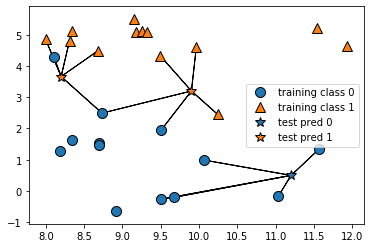

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(df_train_features,df_train_labels.astype("int"))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

**weight** feature can have values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
By default, "uniform" is used.
‘auto’ is the algorithm based on the values passed to fit method, but other can be used: *‘ball_tree’* will use BallTree
*‘kd_tree’* will use KDTree
*‘brute’* will use a brute-force search.

The distance metric used for the tree is by default "minkowski", and with p=2 is equivalent to the standard Euclidean metric. 

To evaluate the model, the score method for train and test data is run:

In [47]:
print("Train set score",knn.score(df_train_features,df_train_labels.astype("int")))

Train set score 0.7375


In [48]:
print("Test set score:",knn.score(df_test_features, df_test_labels.astype("int")))

Test set score: 0.75


In [49]:
y_pred_knn = knn.predict(df_test_features)
y_pred_knn

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [50]:
scores_knn = score_model(knn,df_test_features,0.5)
print(np.array(scores_knn))
print(df_test_labels.astype("int"))

[0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


Fewer neighbors corresponds to a more complex model.
In the next cell, the score for different number of neighbors is presented. 

When using only a  single nearest neighbor, the prediction on the training set is perfect. When more neighbors are considered, the model becomes simpler and the training accuracy drops. 

The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. 

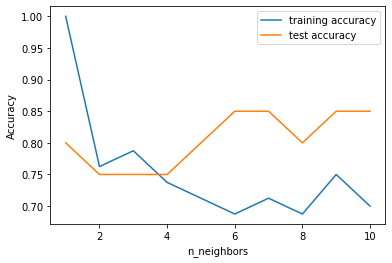

In [51]:
%matplotlib inline
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(df_train_features,df_train_labels.astype("int"))
     # record training set accuracy
    training_accuracy.append(knn.score(df_train_features,df_train_labels.astype("int")))
     # record generalization accuracy
    test_accuracy.append(knn.score(df_test_features, df_test_labels.astype("int")))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


Strengths of k-NN:
* the model is very easy to understand,
* the model gives reasonable performance without a lot of adjustments. 
* Using this algorithm is a good baseline method to try before considering more advanced techniques. 

Weaknesses of k-NN:
* For large datasets (either in number of features or in number of samples) prediction can be slow.
* When using the k-NN algorithm, it’s important to preprocess your data (it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).


# Linear models for classification

For linear models for regression, the output, ŷ, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. 

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm. LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm.
For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization.  Regularization means explicitly restricting a model to avoid overfitting. 

In high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important when considering more features. It is necessary to keep the balance between the simplicity of the model and performance on training data.

In [52]:
logreg = LogisticRegression().fit(df_train_features,df_train_labels.astype("int"))
print("Training set score: {:.3f}".format(logreg.score(df_train_features,df_train_labels.astype("int"))))
print("Test set score: {:.3f}".format(logreg.score(df_test_features,df_test_labels.astype("int"))))

Training set score: 0.812
Test set score: 0.700


C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.29701079 -0.13576985 -0.29014672 -0.36110875 -0.02592044 -0.25087138
  -0.71376636  0.32387076  0.28005959  0.48120959  0.52178627  0.30607641
  -0.25663989 -0.45474482 -1.54004928]]
[0.21613628]


In [54]:
y_pred_logreg_l2 = logreg .predict(df_test_features)
y_pred_logreg_l2

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [21]:
lsvc = LinearSVC().fit(df_train_features,df_train_labels.astype("int"))
print("Training set score: {:.3f}".format(lsvc.score(df_train_features,df_train_labels.astype("int"))))
print("Test set score: {:.3f}".format(lsvc.score(df_test_features,df_test_labels.astype("int"))))

Training set score: 0.825
Test set score: 0.700


In [55]:
y_pred_lsvc = lsvc.predict(df_test_features)
y_pred_lsvc

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

By default, both models apply an L2 regularization and default value of C=1 regularization parameter.

In the next step, L1 regularization is used with three different regularization parameters. L1 regularization means that some coefficients in linear model will not be close, but equal to zero.It limits the model to using only a few features.

In [56]:
for C in[0.001, 1, 100]:
 lr_l1 = LogisticRegression(C=C, penalty="l1",max_iter=1000, solver='liblinear').fit(df_train_features,df_train_labels.astype("int"))
 print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(df_train_features,df_train_labels.astype("int"))))
 print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
 C, lr_l1.score(df_test_features,df_test_labels.astype("int"))))

Training accuracy of l1 logreg with C=0.001: 0.50
Test accuracy of l1 logreg with C=0.001: 0.50
Training accuracy of l1 logreg with C=1.000: 0.80
Test accuracy of l1 logreg with C=1.000: 0.70
Training accuracy of l1 logreg with C=100.000: 0.84
Test accuracy of l1 logreg with C=100.000: 0.65


Both training and test set accuracy decrease relative to the default parameters.

For small datasets, ‘liblinear’ is a good choice for algorithm and can handle L1 penalty.Small values for C mean simple models. If is assumed that only a few of fea‐
tures are actually important, L1 should be used. Otherwise, you should default to L2.

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). In the following example, it is done for the value C=1 and 'liblinear' algorithm. 

In [57]:
lr_l1 = LogisticRegression(C=1, penalty="l1",max_iter=10000, solver='liblinear').fit(df_train_features,df_train_labels.astype("int"))
print("Training accuracy of l1 logreg", lr_l1.score(df_train_features,df_train_labels.astype("int")))

Training accuracy of l1 logreg 0.8


In [58]:
y_pred_lr1 = lr_l1.predict(df_test_features)
y_pred_lr1

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [59]:
scores_lr1 = score_model(lr_l1, df_test_features,0.5)
print(np.array(scores_lr1))
print(df_test_labels.astype("int"))

[0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


# Decision trees

Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. The recursive partitioning of the data is repeated until each region in the partition(each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the
same target value is called **pure**. 

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. 

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. 

In [60]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(tree.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(tree.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 1.000
Accuracy on test set: 0.800


#### Comment: As expected, the accuracy on the training set is 100%—because the leaves are pure,the tree was grown deep enough that it could perfectly memorize all the labels on the training data.If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. 

In [61]:
tree_pruned = DecisionTreeClassifier(max_depth=7,random_state=0)
tree_pruned.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(tree_pruned.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(tree_pruned.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 0.988
Accuracy on test set: 0.800


In [62]:
%matplotlib inline
def plot_feature_importances_(model):
 n_features = 15
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), df.columns[:15])
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")

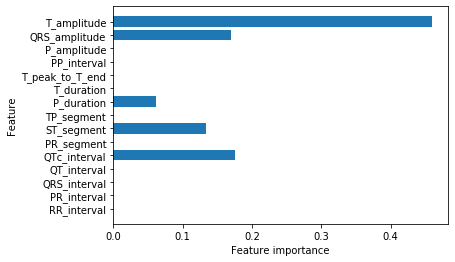

In [63]:
plot_feature_importances_(tree_pruned)

In [64]:
y_pred_tree = tree_pruned.predict(df_test_features)
y_pred_tree

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [65]:
scores_tree = score_model(tree_pruned,df_test_features,0.5)
print(np.array(scores_tree))
print(df_test_labels.astype("int"))

[0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [33]:
#Ovo će biti dopunjeno

In [66]:

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(forest.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(forest.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 1.000
Accuracy on test set: 0.900


In [67]:

forest_pruned= RandomForestClassifier(max_depth=5,n_estimators=100, random_state=0)
forest_pruned.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.3f}".format(forest_pruned.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.3f}".format(forest_pruned.score(df_test_features,df_test_labels.astype("int"))))


Accuracy on training set: 0.975
Accuracy on test set: 0.850


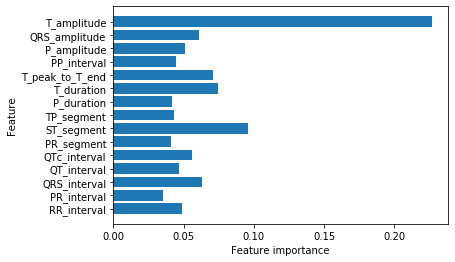

In [68]:
plot_feature_importances_(forest_pruned)

In [69]:
y_pred_forest = forest_pruned.predict(df_test_features)
y_pred_forest

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [70]:
scores_forest_pruned = score_model(forest_pruned,df_test_features, 0.5)
print(np.array(scores_forest_pruned))
print(df_test_labels.astype("int"))

[0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [71]:
#ovo će  biti dopunjeno

In [72]:
svc = SVC(probability=True)
svc.fit(df_train_features,df_train_labels.astype("int"))
print("Accuracy on training set: {:.2f}".format(svc.score(df_train_features,df_train_labels.astype("int"))))
print("Accuracy on test set: {:.2f}".format(svc.score(df_test_features,df_test_labels.astype("int"))))

Accuracy on training set: 0.89
Accuracy on test set: 0.80


In [73]:
y_pred_svc = svc.predict(df_test_features)
y_pred_svc

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [74]:
scores_svc = score_model(svc,df_test_features, 0.5)
print(np.array(scores_svc))
print(df_test_labels.astype("int"))

[0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


# OVERALL SCORES - TRAIN/TEST SPLIT

In [75]:
set_score=np.zeros((9,2))
set_score[0,0]=knn.score(df_train_features,df_train_labels.astype("int"))
set_score[0,1]=knn.score(df_test_features,df_test_labels.astype("int"))

set_score[1,0]=logreg.score(df_train_features,df_train_labels.astype("int"))
set_score[1,1]=logreg.score(df_test_features,df_test_labels.astype("int"))

set_score[2,0]=lsvc.score(df_train_features,df_train_labels.astype("int"))
set_score[2,1]=lsvc.score(df_test_features,df_test_labels.astype("int"))

set_score[3,0]=lr_l1.score(df_train_features,df_train_labels.astype("int"))
set_score[3,1]=lr_l1.score(df_test_features,df_test_labels.astype("int"))

set_score[4,0]=tree.score(df_train_features,df_train_labels.astype("int"))
set_score[4,1]=tree.score(df_test_features,df_test_labels.astype("int"))

set_score[5,0]=tree_pruned.score(df_train_features,df_train_labels.astype("int"))                
set_score[5,1]=tree_pruned.score(df_test_features,df_test_labels.astype("int"))

set_score[6,0]=forest.score(df_train_features,df_train_labels.astype("int"))
set_score[6,1]=forest.score(df_test_features,df_test_labels.astype("int"))

set_score[7,0]=forest_pruned.score(df_train_features,df_train_labels.astype("int"))
set_score[7,1]=forest_pruned.score(df_test_features,df_test_labels.astype("int"))

set_score[8,0]=svc.score(df_train_features,df_train_labels.astype("int"))
set_score[8,1]=svc.score(df_test_features,df_test_labels.astype("int"))

In [76]:
set_score=pd.DataFrame(set_score, columns=["Train","Test"], index=["KNN", "logistic(L2)"," LSVC(L2)", "Logistic(L1)","Tree","Tree (pruned)","Random forest","Random forest pruned","SVC"])

In [77]:
set_score

,Train,Test
KNN,0.7000,0.85
logistic(L2),0.8125,0.70
LSVC(L2),0.8250,0.70
Logistic(L1),0.8000,0.70
Tree,1.0000,0.80
Tree (pruned),0.9875,0.80
Random forest,1.0000,0.90
Random forest pruned,0.9750,0.85
SVC,0.8875,0.80


For different methods train and test scores differ, which means there should be no underfitting and also, no overfitting because the difference is not too high.

In [78]:
Y_predicted_overall=[y_pred_knn,y_pred_logreg_l2,y_pred_lsvc, y_pred_lr1,y_pred_tree,y_pred_forest,y_pred_svc]
Y_methods=["KNN","Logistic regression +L2","LinearSVC","Logistic regression + L1 Regularization","Tree -pruned","Random forest pruned","SVC"]

for i in range(len(Y_predicted_overall)):
    
    print("Classification report - ", Y_methods[i])
    classification_report_test(df_test_labels.astype("int"),Y_predicted_overall[i])


Classification report -  KNN
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.86      0.60      0.71        10

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.74        20
weighted avg       0.77      0.75      0.74        20

Classification report -  Logistic regression +L2
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20

Classification report -  LinearSVC
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.67      0.80      0.73        10

    accuracy                           0.70        20
   macro avg   

# OVERALL SCORES - CROSS VALIDATION

In [79]:
def cross_val_1(model):
    scoring={'accuracy':make_scorer(accuracy_score),"precision":make_scorer(precision_score),
           "recall":make_scorer(recall_score),"f1_score":make_scorer(f1_score)}
    skf=StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
    scores = cross_validate(model,df,df["Category"].astype("int"),cv=skf,scoring=scoring, return_train_score=True)
    return scores

In [81]:
knn = KNeighborsClassifier(n_neighbors=4)
#high variance between scores

logreg = LogisticRegression()

lsvc = LinearSVC()

lr_l1=LogisticRegression(C=1, penalty="l1",max_iter=100000, solver='liblinear')

tree_pruned = DecisionTreeClassifier(max_depth=7,random_state=0)

random_forest_pruned=RandomForestClassifier(max_depth=5,n_estimators=100, random_state=0)

svc = SVC()



model=[knn,logreg,lsvc,lr_l1,tree_pruned,random_forest_pruned,svc]

model_name= ["KNN","Logistic regression","Linear SVC", "Logistic regression + L1 Regularization","Tree - max depth=7","Random forest pruned","SVC"]

for n in range(len(model)):
    
    print("Stratified Cross-validation score - ", model_name[n])
    cross_tree=cross_val(model[n])
    print("\n")
    
    cross_new=cross_val_1(model[n])
    
    print('           Train:      Test:')
    print('Accuracy   %6.2f' % cross_new['train_accuracy'].mean() + '        %6.2f' % cross_new['test_accuracy'].mean())
    print('Precision  %6.2f' % cross_new['train_precision'].mean() + '        %6.2f' % cross_new['test_precision'].mean())
    print('Recall     %6.2f' % cross_new['train_recall'].mean() + '        %6.2f' % cross_new['test_recall'].mean())
    print('F1         %6.2f' % cross_new['train_f1_score'].mean() + '        %6.2f' % cross_new['test_f1_score'].mean())
    
    print("\n")    

Stratified Cross-validation score -  KNN
Cross-validation scores: [0.65 0.5  0.75 0.65 0.75]
Accuracy: 0.66 (+/- 0.18)


           Train:      Test:
Accuracy     0.73          0.66
Precision    0.89          0.77
Recall       0.53          0.44
F1           0.67          0.56


Stratified Cross-validation score -  Logistic regression
Cross-validation scores: [1.   1.   1.   0.95 1.  ]
Accuracy: 0.99 (+/- 0.04)




C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

           Train:      Test:
Accuracy     1.00          0.99
Precision    1.00          1.00
Recall       0.99          0.98
F1           1.00          0.99


Stratified Cross-validation score -  Linear SVC
Cross-validation scores: [0.45 0.5  0.6  0.5  0.85]
Accuracy: 0.58 (+/- 0.29)




C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

           Train:      Test:
Accuracy     0.74          0.69
Precision    0.87          0.86
Recall       0.57          0.52
F1           0.68          0.62


Stratified Cross-validation score -  Logistic regression + L1 Regularization
Cross-validation scores: [1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


           Train:      Test:
Accuracy     1.00          1.00
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


Stratified Cross-validation score -  Tree - max depth=7
Cross-validation scores: [1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


           Train:      Test:
Accuracy     1.00          1.00
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


Stratified Cross-validation score -  Random forest pruned
Cross-validation scores: [1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


           Train:      Test:
Accuracy     1.00          1.00
Precision    1.00          1.00
Recall       1.00          1.

C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193:

           Train:      Test:
Accuracy     1.00          0.50
Precision    1.00          0.10
Recall       1.00          0.20
F1           1.00          0.13




C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ehlimana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
scores_overall=[scores_knn,scores_lr1,scores_tree,scores_forest_pruned,scores_svc ]
score_names=["knn","Logistic regression + L1 regularization", "Tree - max depth=7","Random forest pruned","SVC"]
for i in range(len(score_names)):
    print("Model:", score_names[i])
    
    print_metrics(df_test_labels.astype("int"), scores_overall[i] )  
    print("\n")

Model: knn
                 Confusion matrix
                 Score MI    Score Control
Actual MI             9                 1
Actual Control        4                 6

Accuracy  0.75
 
           Score MI      Score Control
Num case       10            10
Precision    0.69          0.86
Recall       0.90          0.60
F1           0.78          0.71


Model: Logistic regression + L1 regularization
                 Confusion matrix
                 Score MI    Score Control
Actual MI             6                 4
Actual Control        2                 8

Accuracy  0.70
 
           Score MI      Score Control
Num case       10            10
Precision    0.75          0.67
Recall       0.60          0.80
F1           0.67          0.73


Model: Tree - max depth=7
                 Confusion matrix
                 Score MI    Score Control
Actual MI             8                 2
Actual Control        2                 8

Accuracy  0.80
 
           Score MI      Score Control
Nu